In [7]:
%matplotlib inline

import os
import ast
import csv
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.linalg import expm

use_latex = True # Set to True to use LaTeX for text rendering
save_figs = True  # Save figures

In [8]:
if use_latex:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": 'Computer Modern Roman'
    })
    
if save_figs:
    figures_directory = '../figs'
    if not os.path.exists(figures_directory):
        os.makedirs(figures_directory)
        print(f"The directory '{figures_directory}' was created.")
    figures_subdirectory = '../figs/diff_F'
    if not os.path.exists(figures_subdirectory):
        os.makedirs(figures_subdirectory)
        print(f"The subdirectory '{figures_subdirectory}' was created.")

In [9]:
# Mine
data_x_true = pd.read_csv('../data/data_x_true.csv')
data_F = pd.read_csv('../data/data_F.csv')

# GMAT
data_gmat_x_true = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_x_true.csv')
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# ODTBX
data_odtbx_x_true = scipy.io.loadmat('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_odtbx/data_odtbx_x_true.mat')
data_odtbx_F = scipy.io.loadmat('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_odtbx/data_odtbx_F.mat')

# TudatPy
data_tudatpy_x_true = pd.read_csv('../data/data_tudatpy/data_tudatpy_x_true.csv')
data_tudatpy_STM = pd.read_csv('../data/data_tudatpy/data_tudatpy_STM.csv')

# Time 
t = data_gmat_x_true['Chief1.A1ModJulian']
t = (t - t.iloc[0]) * 24 * 60 / 60

In [10]:
def convert_to_matrix(cell):
    values = list(map(float, cell.split()))
    matrix = np.array(values).reshape(6, 6)
    return matrix
data_F = data_F.map(convert_to_matrix, na_action=None)
data_F.head()

,F_chief,F_deputy1,F_deputy2,F_deputy3
0,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
1,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
2,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
3,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
4,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."


In [11]:
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# Function to split and convert string to list of floats
def safe_split(cell):
    return [float(i) for i in cell.split()]

# Applying the safe_split function directly
data_gmat_STM['Chief1.OrbitSTM'] = data_gmat_STM['Chief1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy1.OrbitSTM'] = data_gmat_STM['Deputy1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy2.OrbitSTM'] = data_gmat_STM['Deputy2.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy3.OrbitSTM'] = data_gmat_STM['Deputy3.OrbitSTM'].apply(safe_split)

# Convert the list of floats to a numpy array and reshape to 6x6 matrix
def to_matrix(data, col_name):
    matrices = []
    for i in range(0, len(data), 6):
        concatenated = sum(data[col_name][i:i+6], [])
        matrix = np.array(concatenated).reshape(6, 6)
        matrices.append(matrix)
    return matrices

# Applying the conversion function for each set of columns
data_gmat_STM = pd.DataFrame({
    'Chief1.OrbitSTM': to_matrix(data_gmat_STM, 'Chief1.OrbitSTM'),
    'Deputy1.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy1.OrbitSTM'),
    'Deputy2.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy2.OrbitSTM'),
    'Deputy3.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy3.OrbitSTM')
})
data_gmat_STM.head()

,Chief1.OrbitSTM,Deputy1.OrbitSTM,Deputy2.OrbitSTM,Deputy3.OrbitSTM
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0...."
1,"[[0.9981689439620951, 0.0001716211897879884, -...","[[0.9978890683277409, -0.0001351105966067479, ...","[[1.000334346901248, -0.0009486093746323718, 0...","[[0.9985127650605418, 0.001088842341768236, 0...."
2,"[[0.9929314481129171, 0.0007531614843922891, -...","[[0.9915595167538112, -0.000466690697388276, 0...","[[1.001769121837702, -0.004036741531891781, 0....","[[0.9939972631206854, 0.004171828328393572, 0...."
3,"[[0.9847561078096569, 0.001842291506949013, -0...","[[0.9810311709286847, -0.0008844413765925296, ...","[[1.00497654688086, -0.009641051503204875, 0.0...","[[0.9863853576316817, 0.008980706700405905, 0...."
4,"[[0.9742201803753571, 0.00353396231041239, -0....","[[0.9663437598962007, -0.001278172748495508, 0...","[[1.010655644289007, -0.01815130606648692, 0.0...","[[0.9756259138873504, 0.0152589002930367, 0.02..."


In [27]:
# Function to convert a JSON-like string to a numpy array
def string_to_matrix(matrix_str):
    return np.array(ast.literal_eval(matrix_str))

data_tudatpy_STM = {
    'STM_chief': [],
    'STM_deputy1': [],
    'STM_deputy2': [],
    'STM_deputy3': []
}

with open('../data/data_tudatpy/data_tudatpy_STM.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data_tudatpy_STM['STM_chief'].append(string_to_matrix(row['STM_chief']))
        data_tudatpy_STM['STM_deputy1'].append(string_to_matrix(row['STM_deputy1']))
        data_tudatpy_STM['STM_deputy2'].append(string_to_matrix(row['STM_deputy2']))
        data_tudatpy_STM['STM_deputy3'].append(string_to_matrix(row['STM_deputy3']))

    
data_tudatpy_STM = pd.DataFrame(data_tudatpy_STM)
data_tudatpy_STM.head()

,STM_chief,STM_deputy1,STM_deputy2,STM_deputy3
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0...."
1,"[[0.9981689435631825, 0.00017162096844999531, ...","[[0.9978890681612209, -0.00013511076259937942,...","[[1.0003343471453674, -0.0009486088851394456, ...","[[0.9985127655783332, 0.001088842156261645, 0...."
2,"[[0.9929314464210358, 0.0007531605672896602, -...","[[0.9915595160288692, -0.0004666914104405899, ...","[[1.001769122740146, -0.004036739543701797, 0....","[[0.9939972652303571, 0.004171827691368786, 0...."
3,"[[0.9847561038433538, 0.0018422893832383198, -...","[[0.9810311691686805, -0.0008844430816589634, ...","[[1.0049765487440856, -0.00964104697327085, 0....","[[0.986385362450673, 0.008980705494936686, 0.0..."
4,"[[0.9742201731509602, 0.003533958447061528, -0...","[[0.9663437565468623, -0.0012781759419939662, ...","[[1.0106556473055381, -0.018151297933684994, 0...","[[0.9756259225561498, 0.015258898535496435, 0...."


In [13]:
# Playground
idx = 1
dt = 60
time = idx * dt
t_0 = 0

STM = expm(data_F['F_chief'][idx] * (time - t_0))
gmat_STM = data_gmat_STM['Chief1.OrbitSTM'][idx]
chief_gmat_state_vector = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z', 'Chief1.EarthMJ2000Eq.VX', 'Chief1.EarthMJ2000Eq.VY', 'Chief1.EarthMJ2000Eq.VZ']].to_numpy()

print(gmat_STM @ chief_gmat_state_vector[0], np.sqrt(np.sum((gmat_STM @ chief_gmat_state_vector[0])**2, axis=0)))
print(chief_gmat_state_vector[idx], np.sqrt(np.sum(chief_gmat_state_vector[idx]**2, axis=0)))
print(np.sqrt(np.sum((gmat_STM @ chief_gmat_state_vector[0] - chief_gmat_state_vector[idx])**2, axis=0)))

[-1.74721815e+03 -9.21834593e+02  6.73845465e+03 -7.63850298e+00
  6.12876032e-02 -4.42848677e-01] 7022.063790076083
[-1.73814204e+03 -9.16018271e+02  6.69574551e+03 -7.32023914e+00
  2.54842214e-01 -1.86411295e+00] 6978.057919747132
44.07305621935352


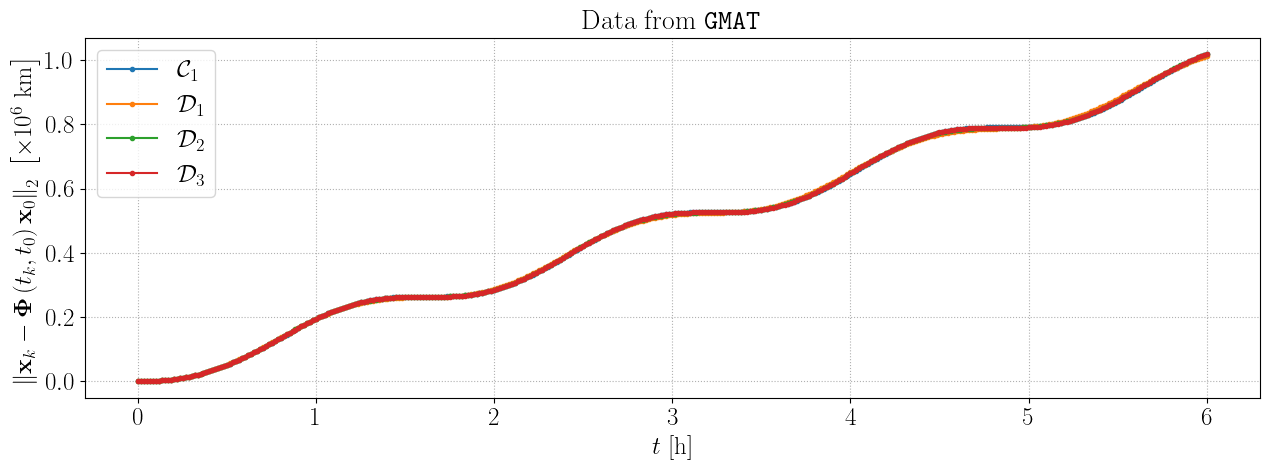

In [14]:
chief_gmat_state_vector = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z', 'Chief1.EarthMJ2000Eq.VX', 'Chief1.EarthMJ2000Eq.VY', 'Chief1.EarthMJ2000Eq.VZ']].to_numpy()
deputy1_gmat_state_vector = data_gmat_x_true[['Deputy1.EarthMJ2000Eq.X', 'Deputy1.EarthMJ2000Eq.Y', 'Deputy1.EarthMJ2000Eq.Z', 'Deputy1.EarthMJ2000Eq.VX', 'Deputy1.EarthMJ2000Eq.VY', 'Deputy1.EarthMJ2000Eq.VZ']].to_numpy()
deputy2_gmat_state_vector = data_gmat_x_true[['Deputy2.EarthMJ2000Eq.X', 'Deputy2.EarthMJ2000Eq.Y', 'Deputy2.EarthMJ2000Eq.Z', 'Deputy2.EarthMJ2000Eq.VX', 'Deputy2.EarthMJ2000Eq.VY', 'Deputy2.EarthMJ2000Eq.VZ']].to_numpy()
deputy3_gmat_state_vector = data_gmat_x_true[['Deputy3.EarthMJ2000Eq.X', 'Deputy3.EarthMJ2000Eq.Y', 'Deputy3.EarthMJ2000Eq.Z', 'Deputy3.EarthMJ2000Eq.VX', 'Deputy3.EarthMJ2000Eq.VY', 'Deputy3.EarthMJ2000Eq.VZ']].to_numpy()

dev_STM_chief, dev_STM_deputy1, dev_STM_deputy2, dev_STM_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_STM_chief.append(np.sqrt(np.sum((chief_gmat_state_vector[idx] - data_gmat_STM['Chief1.OrbitSTM'][idx] @ chief_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy1.append(np.sqrt(np.sum((deputy1_gmat_state_vector[idx] - data_gmat_STM['Deputy1.OrbitSTM'][idx] @ deputy1_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy2.append(np.sqrt(np.sum((deputy2_gmat_state_vector[idx] - data_gmat_STM['Deputy2.OrbitSTM'][idx] @ deputy2_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy3.append(np.sqrt(np.sum((deputy3_gmat_state_vector[idx] - data_gmat_STM['Deputy3.OrbitSTM'][idx] @ deputy3_gmat_state_vector[0])**2, axis=0)))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(1, 1, figsize=(6.4 * 2, 4.8 * 1))

# Apply fontsize to ticks
axs.tick_params(axis='both', which='major', labelsize=18)  # major ticks
axs.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs.plot(t, np.array(dev_STM_chief) * 1e-6, '.-', label='$\mathcal{C}_1$')
axs.plot(t, np.array(dev_STM_deputy1) * 1e-6, '.-', label='$\mathcal{D}_1$')
axs.plot(t, np.array(dev_STM_deputy2) * 1e-6, '.-', label='$\mathcal{D}_2$')
axs.plot(t, np.array(dev_STM_deputy3) * 1e-6, '.-', label='$\mathcal{D}_3$')
axs.set_xlabel("$t$ [h]", fontsize=18)
axs.set_ylabel("$\left\|\mathbf{x}_k - \mathbf{\Phi}\left(t_k, t_0\\right)\mathbf{x}_0\\right\|_2 \ \left[\\times 10^6 \ \mathrm{km}\\right]$", fontsize=18)
axs.grid(linestyle=':')
axs.legend(fontsize=18)
axs.set_title("Data from \\texttt{GMAT}", fontsize=20)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_gmat.png', dpi=300)
plt.show()

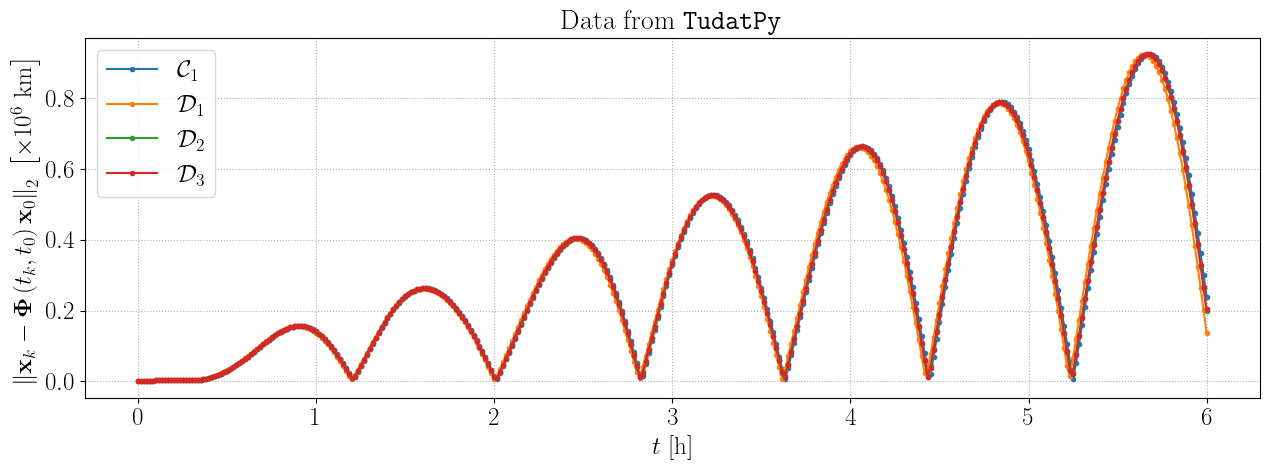

In [31]:
chief_tudatpy_state_vector = data_tudatpy_x_true[['x_chief', 'y_chief', 'z_chief', 'vx_chief', 'vy_chief', 'vz_chief']].to_numpy()
deputy1_tudatpy_state_vector = data_tudatpy_x_true[['x_deputy1', 'y_deputy1', 'z_deputy1', 'vx_deputy1', 'vy_deputy1', 'vz_deputy1']].to_numpy()
deputy2_tudatpy_state_vector = data_tudatpy_x_true[['x_deputy2', 'y_deputy2', 'z_deputy2', 'vx_deputy2', 'vy_deputy2', 'vz_deputy2']].to_numpy()
deputy3_tudatpy_state_vector = data_tudatpy_x_true[['x_deputy3', 'y_deputy3', 'z_deputy3', 'vx_deputy3', 'vy_deputy3', 'vz_deputy3']].to_numpy()

dev_STM_chief, dev_STM_deputy1, dev_STM_deputy2, dev_STM_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_STM_chief.append(np.sqrt(np.sum((chief_tudatpy_state_vector[idx] - data_tudatpy_STM['STM_chief'][idx] @ chief_tudatpy_state_vector[0])**2, axis=0)))
    dev_STM_deputy1.append(np.sqrt(np.sum((deputy1_tudatpy_state_vector[idx] - data_tudatpy_STM['STM_deputy1'][idx] @ deputy1_tudatpy_state_vector[0])**2, axis=0)))
    dev_STM_deputy2.append(np.sqrt(np.sum((deputy2_tudatpy_state_vector[idx] - data_tudatpy_STM['STM_deputy2'][idx] @ deputy2_tudatpy_state_vector[0])**2, axis=0)))
    dev_STM_deputy3.append(np.sqrt(np.sum((deputy3_tudatpy_state_vector[idx] - data_tudatpy_STM['STM_deputy3'][idx] @ deputy3_tudatpy_state_vector[0])**2, axis=0)))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(1, 1, figsize=(6.4 * 2, 4.8 * 1))

# Apply fontsize to ticks
axs.tick_params(axis='both', which='major', labelsize=18)  # major ticks
axs.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs.plot(t, np.array(dev_STM_chief) * 1e-6, '.-', label='$\mathcal{C}_1$')
axs.plot(t, np.array(dev_STM_deputy1) * 1e-6, '.-', label='$\mathcal{D}_1$')
axs.plot(t, np.array(dev_STM_deputy2) * 1e-6, '.-', label='$\mathcal{D}_2$')
axs.plot(t, np.array(dev_STM_deputy3) * 1e-6, '.-', label='$\mathcal{D}_3$')
axs.set_xlabel("$t$ [h]", fontsize=18)
axs.set_ylabel("$\left\|\mathbf{x}_k - \mathbf{\Phi}\left(t_k, t_0\\right)\mathbf{x}_0\\right\|_2 \ \left[\\times 10^6 \ \mathrm{km}\\right]$", fontsize=18)
axs.grid(linestyle=':')
axs.legend(fontsize=18)
axs.set_title("Data from \\texttt{TudatPy}", fontsize=20)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_tudatpy.png', dpi=300)
plt.show()

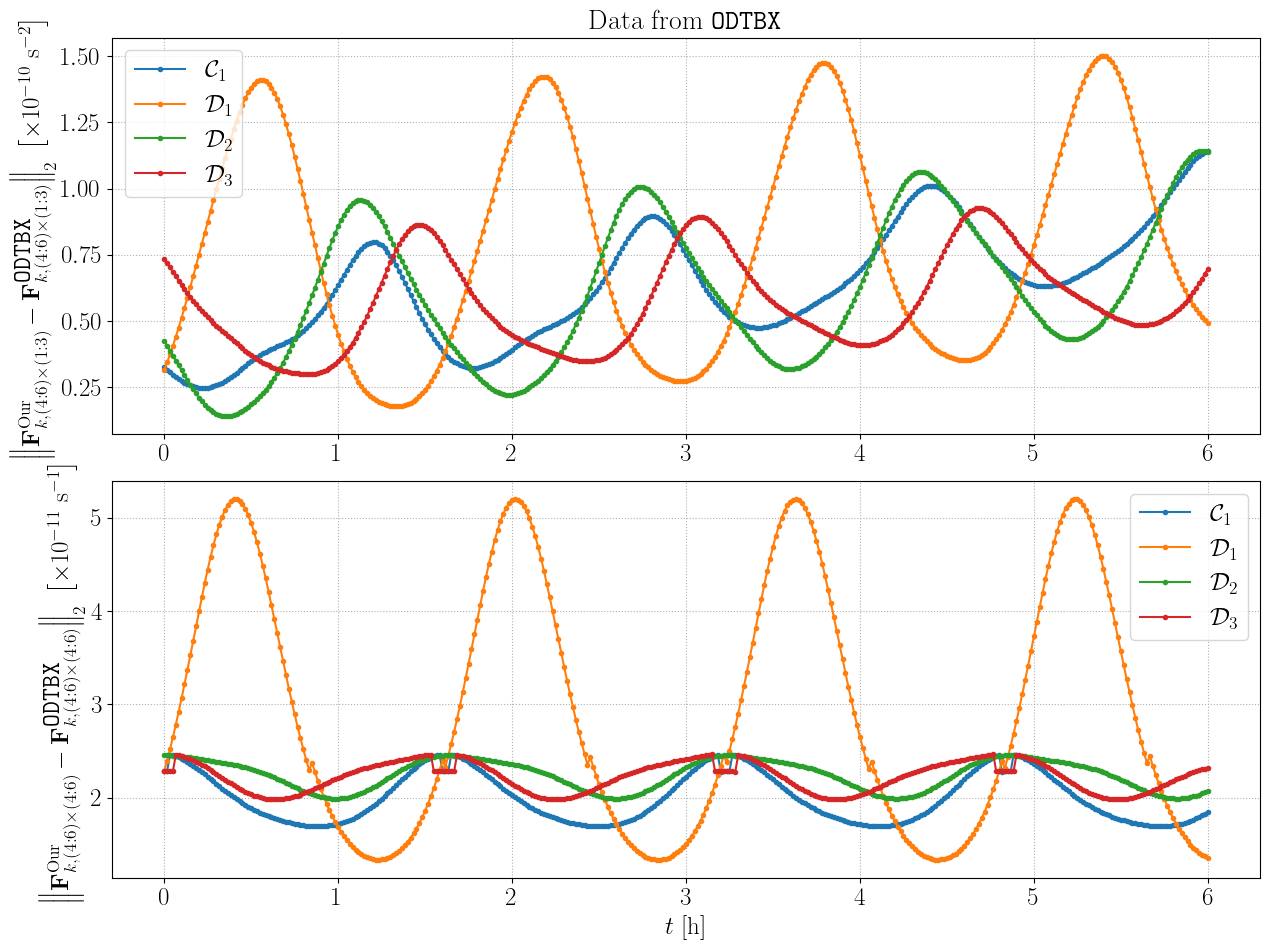

In [ ]:
dev_F_subA_chief, dev_F_subB_chief, dev_F_subC_chief, dev_F_subD_chief = [], [], [], []
dev_F_subA_deputy1, dev_F_subB_deputy1, dev_F_subC_deputy1, dev_F_subD_deputy1 = [], [], [], []
dev_F_subA_deputy2, dev_F_subB_deputy2, dev_F_subC_deputy2, dev_F_subD_deputy2 = [], [], [], []
dev_F_subA_deputy3, dev_F_subB_deputy3, dev_F_subC_deputy3, dev_F_subD_deputy3 = [], [], [], []
for idx in range(len(t)):
    dev_F_subA_chief.append(np.linalg.norm(data_F['F_chief'][idx][0:3, 0:3] - data_odtbx_F['chief'][idx, 0:3, 0:3], ord=2))
    dev_F_subB_chief.append(np.linalg.norm(data_F['F_chief'][idx][0:3, 3:6] - data_odtbx_F['chief'][idx, 0:3, 3:6], ord=2))
    dev_F_subC_chief.append(np.linalg.norm(data_F['F_chief'][idx][3:6, 0:3] - data_odtbx_F['chief'][idx, 3:6, 0:3], ord=2))
    dev_F_subD_chief.append(np.linalg.norm(data_F['F_chief'][idx][3:6, 3:6] - data_odtbx_F['chief'][idx, 3:6, 3:6], ord=2))
    
    dev_F_subA_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][0:3, 0:3] - data_odtbx_F['deputy1'][idx, 0:3, 0:3], ord=2))
    dev_F_subB_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][0:3, 3:6] - data_odtbx_F['deputy1'][idx, 0:3, 3:6], ord=2))
    dev_F_subC_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][3:6, 0:3] - data_odtbx_F['deputy1'][idx, 3:6, 0:3], ord=2))
    dev_F_subD_deputy1.append(np.linalg.norm(data_F['F_deputy1'][idx][3:6, 3:6] - data_odtbx_F['deputy1'][idx, 3:6, 3:6], ord=2))
    
    dev_F_subA_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][0:3, 0:3] - data_odtbx_F['deputy2'][idx, 0:3, 0:3], ord=2))
    dev_F_subB_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][0:3, 3:6] - data_odtbx_F['deputy2'][idx, 0:3, 3:6], ord=2))
    dev_F_subC_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][3:6, 0:3] - data_odtbx_F['deputy2'][idx, 3:6, 0:3], ord=2))
    dev_F_subD_deputy2.append(np.linalg.norm(data_F['F_deputy2'][idx][3:6, 3:6] - data_odtbx_F['deputy2'][idx, 3:6, 3:6], ord=2))
    
    dev_F_subA_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][0:3, 0:3] - data_odtbx_F['deputy3'][idx, 0:3, 0:3], ord=2))
    dev_F_subB_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][0:3, 3:6] - data_odtbx_F['deputy3'][idx, 0:3, 3:6], ord=2))
    dev_F_subC_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][3:6, 0:3] - data_odtbx_F['deputy3'][idx, 3:6, 0:3], ord=2))
    dev_F_subD_deputy3.append(np.linalg.norm(data_F['F_deputy3'][idx][3:6, 3:6] - data_odtbx_F['deputy3'][idx, 3:6, 3:6], ord=2))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 1, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot submatrix errors
# axs[0].plot(t, dev_F_subA_chief, '.-', label='$\mathcal{C}_1$')
# axs[0].plot(t, dev_F_subA_deputy1, '.-', label='$\mathcal{D}_1$')
# axs[0].plot(t, dev_F_subA_deputy2, '.-', label='$\mathcal{D}_2$')
# axs[0].plot(t, dev_F_subA_deputy3, '.-', label='$\mathcal{D}_3$')
# axs[0].set_ylabel("$\left\|\mathbf{x}_k - \mathbf{\Phi}\left(t_k, t_0\\right)\mathbf{x}_0\\right\|_2$ [km]", fontsize=18)
# axs[0].grid(linestyle=':')
# axs[0].legend(fontsize=18)
# axs[0].set_title("Data from \\texttt{ODTBX}", fontsize=20)


# axs[1].plot(t, dev_F_subB_chief, '.-', label='$\mathcal{C}_1$')
# axs[1].plot(t, dev_F_subB_deputy1, '.-', label='$\mathcal{D}_1$')
# axs[1].plot(t, dev_F_subB_deputy2, '.-', label='$\mathcal{D}_2$')
# axs[1].plot(t, dev_F_subB_deputy3, '.-', label='$\mathcal{D}_3$')
# axs[1].set_ylabel("$\left\|\mathbf{x}_k - \mathbf{\Phi}\left(t_k, t_0\\right)\mathbf{x}_0\\right\|_2$ [km]", fontsize=18)
# axs[1].grid(linestyle=':')
# axs[1].legend(fontsize=18)

axs[0].plot(t, np.array(dev_F_subC_chief) * 1e10, '.-', label='$\mathcal{C}_1$')
axs[0].plot(t, np.array(dev_F_subC_deputy1) * 1e10, '.-', label='$\mathcal{D}_1$')
axs[0].plot(t, np.array(dev_F_subC_deputy2) * 1e10, '.-', label='$\mathcal{D}_2$')
axs[0].plot(t, np.array(dev_F_subC_deputy3) * 1e10, '.-', label='$\mathcal{D}_3$')
axs[0].set_ylabel("$\left\|\mathbf{F}_{k, (4:6) \\times (1:3)}^\mathrm{Our} - \mathbf{F}_{k, (4:6) \\times (1:3)}^\\texttt{ODTBX}\\right\|_2\ \left[\\times 10^{-10} \ \mathrm{s}^{-2}\\right]$", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)
axs[0].set_title("Data from \\texttt{ODTBX}", fontsize=20)

axs[1].plot(t, np.array(dev_F_subD_chief) * 1e11, '.-', label='$\mathcal{C}_1$')
axs[1].plot(t, np.array(dev_F_subD_deputy1) * 1e11, '.-', label='$\mathcal{D}_1$')
axs[1].plot(t, np.array(dev_F_subD_deputy2) * 1e11, '.-', label='$\mathcal{D}_2$')
axs[1].plot(t, np.array(dev_F_subD_deputy3) * 1e11, '.-', label='$\mathcal{D}_3$')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$\left\|\mathbf{F}_{k, (4:6) \\times (4:6)}^\mathrm{Our} - \mathbf{F}_{k, (4:6) \\times (4:6)}^\\texttt{ODTBX}\\right\|_2\ \left[\\times 10^{-11} \ \mathrm{s}^{-1}\\right]$", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/F_test_odtbx.png', dpi=300)
plt.show()